<a href="https://www.kaggle.com/code/mikedelong/congress-change-over-time?scriptVersionId=148588581" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/u-s-house-of-representatives-historical-membership/house of representatives historical membership with party affiliation.csv')
df.head()

,congressNum,cbid,lastName,firstName,party
0,15.0,A000003,Abbot,Joel,Republican
1,16.0,A000003,Abbot,Joel,Republican
2,17.0,A000003,Abbot,Joel,Republican
3,18.0,A000003,Abbot,Joel,Crawford Republican
4,28.0,A000004,Abbott,Amos,Whig


In [2]:
from plotly.express import histogram
histogram(data_frame=df.sort_values(by='party'), x='congressNum', color='party', height=800)

This is probably the nut graf; it is cluttered but it shows the progression of all parties over time.

In [3]:
from plotly.express import bar
TOP_N = 20
bar(data_frame=df['party'].value_counts().to_frame().reset_index().head(n=TOP_N), x='party', y='count', log_y=True)

In [4]:
histogram(data_frame=df[df['party'].isin(df['party'].value_counts(sort=True).head(n=TOP_N).index.tolist())], x='congressNum',
          color='party', height=800, title='Top {} parties in Congress over time'.format(TOP_N))

If we restrict our attention to the top twenty parties our legend looks manageable; nothing is going to keep the first 34 or so Congresses from looking strange from our perspective.

In [5]:
bar_df = df.drop(columns=['congressNum']).groupby(by=['cbid', 'lastName', 'firstName',
                                             'party']).size().reset_index().sort_values(ascending=False, by=0).drop(columns=['cbid']).head(n=10)
bar_df['name'] = bar_df['firstName'] + ' ' + bar_df['lastName']
bar(data_frame=bar_df, x='name', y=0, color='party')

Is it a surprise that eight of the top ten longest-serving Congressmen are Democrats?

(-0.5, 1199.5, 1199.5, -0.5)

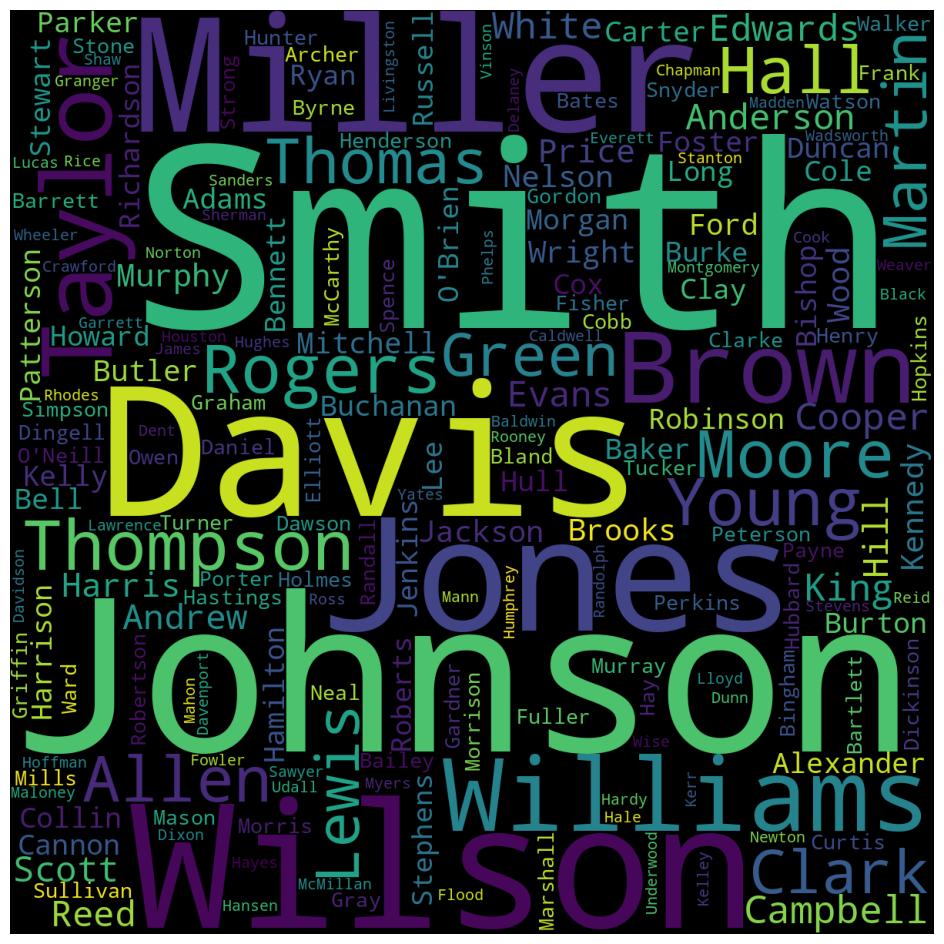

In [6]:
from matplotlib.pyplot import subplots
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from wordcloud import WordCloud

subplots(figsize=(12, 12))
text = ' '.join(df.sample(frac=1)['lastName'].values)
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, ).generate(text=text), )
axis('off')

(-0.5, 1199.5, 1199.5, -0.5)

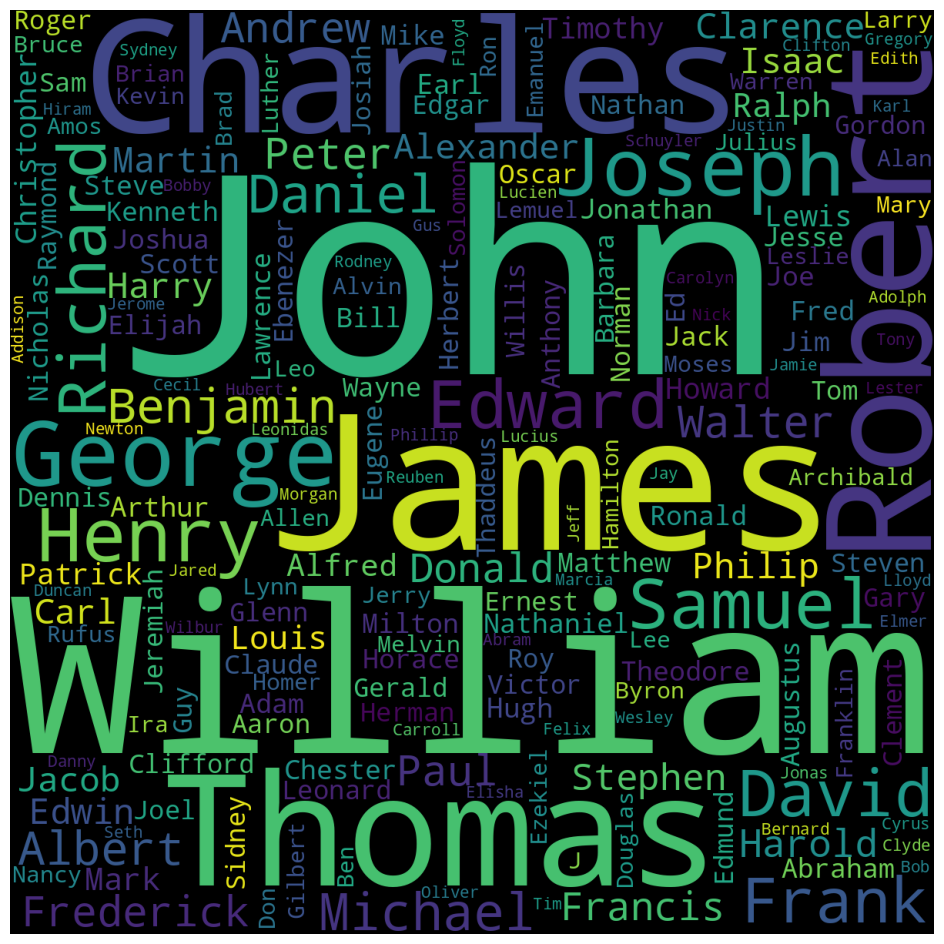

In [7]:
subplots(figsize=(12, 12))
text = ' '.join(df.sample(frac=1)['firstName'].values)
imshow(X=WordCloud(random_state=2023, height=1200, width=1200, ).generate(text=text), )
axis('off')